# Imports


In [13]:
import csv
import os
import numpy as np
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
import random
import dask.dataframe as dd
from collections import defaultdict
from dataclasses import dataclass
from zipfile import ZipFile
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import multiprocessing
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split
import spacy
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Load preprocessed data


In [14]:
# Load processed tweets with target data
with open('processed_Dl.pkl', 'rb') as f:
  X = pickle.load(f)

print('Processed data: {}'.format(X[0:3]))
#X = Commentario preprocessado

Processed data: [['casanova', 'x', 'vicious', 'slash', 'face', 'alterc', 'inmat', 'tell', 'judg', 'long', 'gang', 'member'], ['michael', 'jordan', 'sell', 'major', 'ownership', 'charlott', 'hornet', 'j.', 'cole', 'minor', 'owner', 'team'], ['nba', 'suspend', 'ja', 'morant', 'game', 'late', 'gun', 'incid']]


In [15]:
print(len(X))#tokenized comment

3039


In [16]:
@dataclass
class CONFIG():
  """
  """
  embedding_dim = 300
  maxlen = 50
  vocab_size = 200000
  truncating = 'post'
  padding = 'post'
  oov_token = '<OOV>'
  max_examples = 160000
  training_split = .9

Config = CONFIG()

In [17]:
def fit_tokenizer(train_sentences, oov_token, vocab_size):
  tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
  tokenizer.fit_on_texts(train_sentences)

  return tokenizer

In [18]:
tokenizer = fit_tokenizer(X, oov_token = Config.oov_token, vocab_size = Config.vocab_size)

word_index = tokenizer.word_index

print('Vocab contains {} words'.format(Config.vocab_size))
print('<OOV> token successfully placed in vocabulary!' if '<OOV>' in word_index else 'No <OOV> in vocabulary! something went wrong :(')

Vocab contains 200000 words
<OOV> token successfully placed in vocabulary!


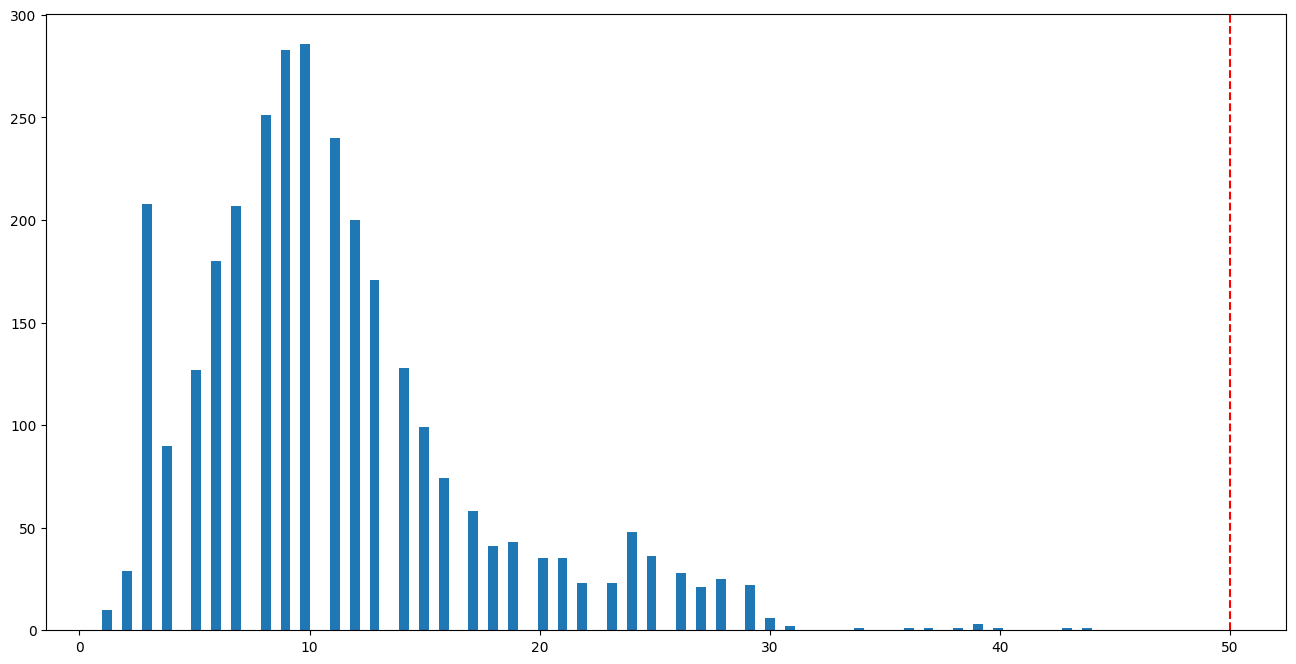

In [19]:
com_lengths = [len(comment) for comment in X]
plt.figure(figsize=(16,8))
plt.hist(com_lengths, 
         bins = 100)
plt.axvline( Config.maxlen, 
            ls = '--',
            c = 'red')
plt.show()

In [20]:
def tokenise_sentences(comments: list,
                       tokenizer: object,
                       padding: str,
                       truncating: str,
                       maxlen: int):
  """
  """

  comments = tokenizer.texts_to_sequences(comments)

  padded_and_trunc_comments = pad_sequences(sequences = comments,
                                          maxlen = maxlen,
                                          truncating = truncating,
                                          padding = padding)
  
  return padded_and_trunc_comments

In [21]:
X = tokenise_sentences(X, tokenizer, Config.padding, Config.truncating, Config.maxlen) 
print('Tokenised comments have shape {}'.format(X.shape))

Tokenised comments have shape (3039, 50)


In [22]:
from tensorflow.keras.models import load_model
loaded_model = load_model('sentiment_classifier_lstm_model.h5')

In [23]:
predictions = loaded_model.predict(X)

95/95 [==============================] - 2s 15ms/step


In [25]:
print(len(predictions))
print(predictions)

3039
[[0.8446879 ]
 [0.7577521 ]
 [0.77654237]
 ...
 [0.20639521]
 [0.4812062 ]
 [0.18163508]]


In [ ]:
realizar un threshold i contar los comentarios negativos respecto el total, generar un indice de negatividad y compararlos todos al final